In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/superstore-sales/superstore_final_dataset (1).csv


**Data Collection**

In [2]:
file_path = '/kaggle/input/superstore-sales/superstore_final_dataset (1).csv'

In [3]:
data = pd.read_csv(file_path,encoding='ISO-8859-1')

In [4]:
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,State,Postal_Code,Region,Product_ID,Category,Sub_Category,Product_Name,Sales
0,1,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,8/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/6/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O Donnel,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold N Roll Cart System,22.3680


**Data Preparation and cleaning**

In [5]:
data.isnull().sum()

Row_ID            0
Order_ID          0
Order_Date        0
Ship_Date         0
Ship_Mode         0
Customer_ID       0
Customer_Name     0
Segment           0
Country           0
City              0
State             0
Postal_Code      11
Region            0
Product_ID        0
Category          0
Sub_Category      0
Product_Name      0
Sales             0
dtype: int64

In [6]:
data['Postal_Code'] = data['Postal_Code'].fillna('00000')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row_ID         9800 non-null   int64  
 1   Order_ID       9800 non-null   object 
 2   Order_Date     9800 non-null   object 
 3   Ship_Date      9800 non-null   object 
 4   Ship_Mode      9800 non-null   object 
 5   Customer_ID    9800 non-null   object 
 6   Customer_Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal_Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product_ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub_Category   9800 non-null   object 
 16  Product_Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [8]:
#Sales Performance Trends

data['Order_Date'] = pd.to_datetime(data['Order_Date'], format="%d/%m/%Y")

data['order_month'] = data['Order_Date'].dt.month

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
#Total revenue 
revenue_over_time = data.groupby('Order_Date', observed = True)['Sales'].sum().reset_index()
revenue_over_time.replace([np.inf, -np.inf], np.nan, inplace=True)
revenue_over_time.dropna(subset=['Sales'], inplace=True)
revenue_over_time

,Order_Date,Sales
0,2015-01-03,16.4480
1,2015-01-04,288.0600
2,2015-01-05,19.5360
3,2015-01-06,4407.1000
4,2015-01-07,87.1580
...,...,...
1225,2018-12-26,814.5940
1226,2018-12-27,177.6360
1227,2018-12-28,1657.3508
1228,2018-12-29,2915.5340


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


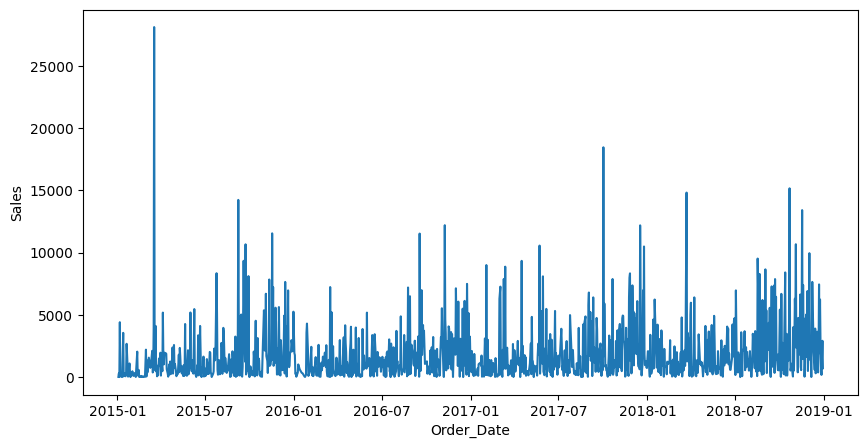

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(x='Order_Date', y='Sales', data=revenue_over_time)
plt.show()

In [12]:
data['order_year'] = data['Order_Date'].dt.year

In [13]:
year_wise_sale = data.groupby('order_year',observed = True)['Sales'].sum().reset_index()
year_wise_sale = year_wise_sale.rename(columns={'Sales': 'Yearly sales'})
year_wise_sale

,order_year,Yearly sales
0,2015,479856.2081
1,2016,459436.0054
2,2017,600192.5500
3,2018,722052.0192


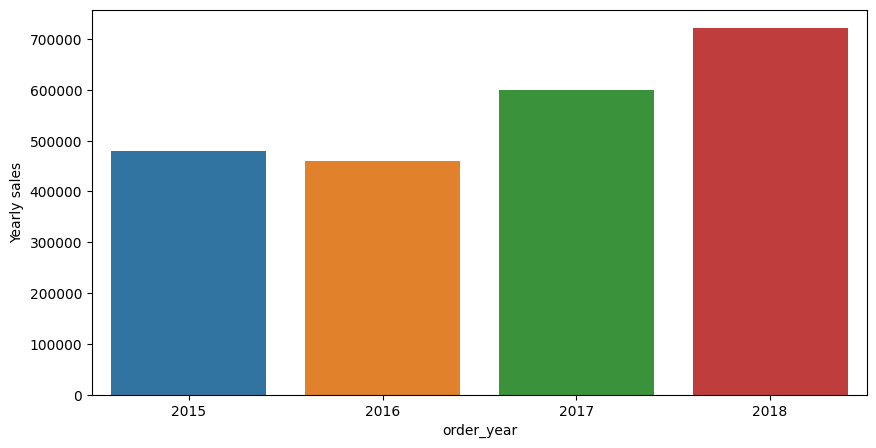

In [14]:
plt.figure(figsize=(10, 5))
sns.barplot(x='order_year', y='Yearly sales', data= year_wise_sale, estimator = np.mean)
plt.show()

In [15]:
month_wise_sale = data.groupby('order_month',observed = True)['Sales'].sum().reset_index()
month_wise_sale = month_wise_sale.rename(columns={'Sales': 'Monthly sales'})
month_wise_sale

,order_month,Monthly sales
0,1,94291.6296
1,2,59371.1154
2,3,197573.5872
3,4,136283.0006
4,5,154086.7237
5,6,145837.5233
6,7,145535.6890
7,8,157315.9270
8,9,300103.4117
9,10,199496.2947


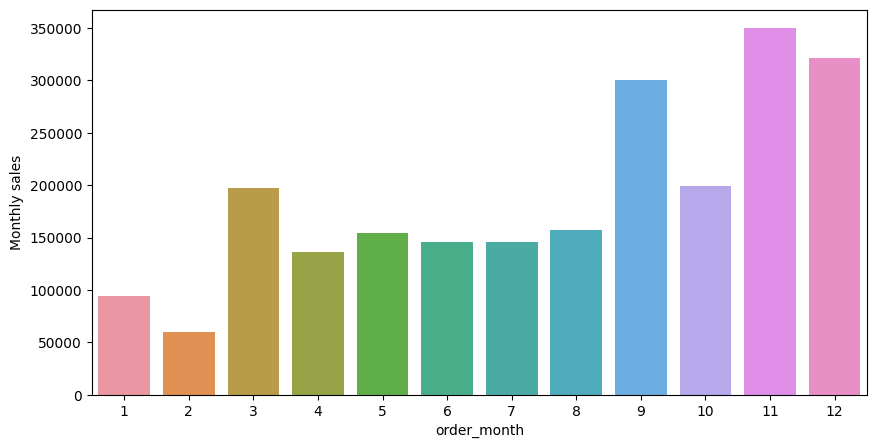

In [16]:
plt.figure(figsize=(10, 5))
sns.barplot(x='order_month', y='Monthly sales', data=month_wise_sale, estimator = np.mean)
plt.show()

# November Month has the highest sales
# Top 3 months with highest sales: November, December, September
# Month: Febraury shows the least sales

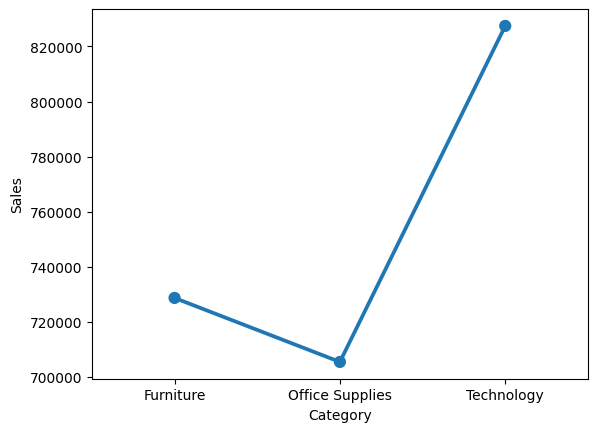

In [17]:
#Best selling category
best_category = data.groupby('Category', observed = True)['Sales'].sum().reset_index()
best_category
sns.pointplot(x='Category', y='Sales', data=best_category)
plt.show()

**We see that the best selling category falls under Technology with over sales of 820000.**

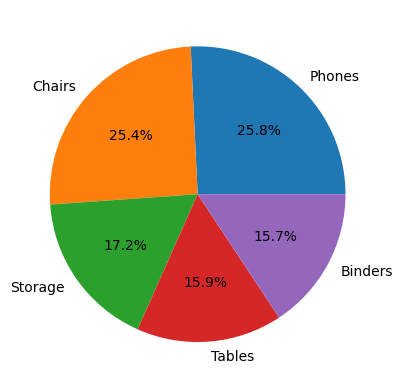

In [18]:
best_subcategory = data.groupby('Sub_Category', observed = True)['Sales'].sum().reset_index()
top_3_subcategory = best_subcategory.nlargest(5, 'Sales')
labels = top_3_subcategory['Sub_Category']
sizes = top_3_subcategory['Sales']
plt.pie(sizes, labels = labels, autopct='%1.1f%%')
plt.show()

**The leading best sub_category that shows highest sales is : Phones from technology and followes by Chairs from Furniture**

In [19]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

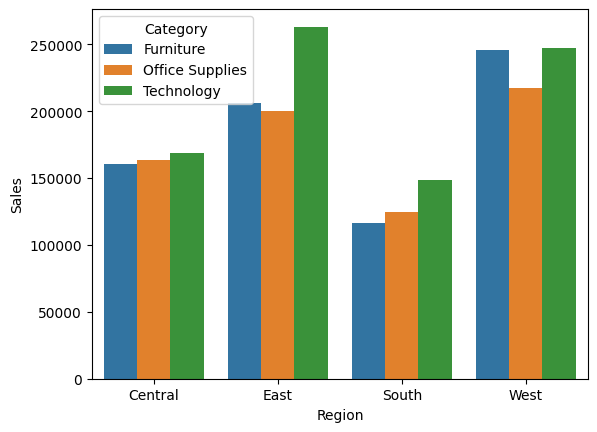

In [20]:
regional_sales = data.groupby(['Region', 'Category'], observed = True)['Sales'].sum().reset_index()
sns.barplot(x='Region', y='Sales', hue = 'Category', data=regional_sales)

plt.show()


**From the 4 reqional sales, we observe that East and west region show more sales compared to the other two regionsoverall sales of technology category products have highest sales in all regionsSouth region shows considerable low sales. This area needs improvement**


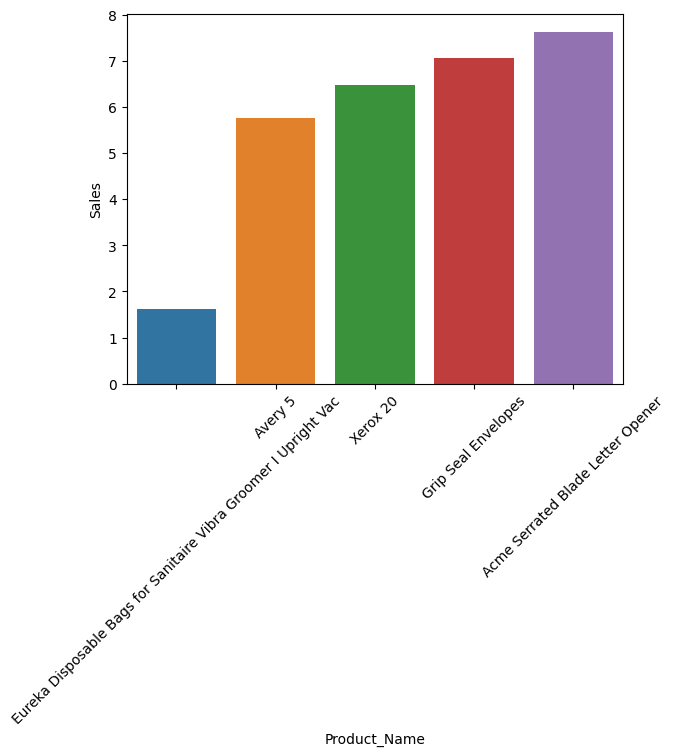

In [21]:
low_product_sales = (data.groupby('Product_Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=True))
low_product_sales.head(5)
sns.barplot(x = 'Product_Name', y = 'Sales', data = low_product_sales.head(5))
plt.xticks(rotation=45)
plt.show()

**The above chart indicates the products with lowest sales. Avery 5 has the lowest sale**

Final Insights: 